In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, vstack
from clevar.catalog import ClCatalog
from astropy.io import ascii

In [2]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/amico_cosmoDC2/mag_i/w_rich/m14/"

In [3]:
cdc_mb = Table.read(inpath + 'c2_p_members_ls38.fits')

In [4]:
cdc_mb

id,id_cluster,ra,dec,z,pmem,mag_g,mag_r,mag_i,mag_z,mag_y,ind_cl
bytes21,bytes21,float64,float64,float64,float64,float32,float32,float32,float32,float32,int64
1250061469,190400020392,51.60980199874522,-25.813791004664473,0.2688342332839966,1.0,18.864174,17.539618,16.976217,16.684072,16.464548,0
1250061470,190400020392,51.598989058789186,-25.81989803405802,0.2688342332839966,1.0,21.394878,20.069475,19.521643,19.246826,19.026482,0
1250061472,190400020392,51.63011579493463,-25.858885068121925,0.2688342332839966,1.0,21.789959,20.473377,19.935364,19.680544,19.451872,0
1250061476,190400020392,51.56322929613384,-25.883914198249208,0.2688342332839966,1.0,22.347212,21.208973,20.75409,20.5127,20.32137,0
1250061483,190400020392,51.66533895052822,-25.829725903061657,0.2688342332839966,1.0,21.830723,20.989664,20.70302,20.539503,20.417994,0
1250061486,190400020392,51.56125878617417,-25.84587519377526,0.2688342332839966,1.0,20.50549,19.191488,18.647673,18.351637,18.133585,0
1250061487,190400020392,51.64545264492837,-25.810995582007827,0.2688342332839966,1.0,19.531464,18.206907,17.643509,17.351362,17.131838,0
1250061489,190400020392,51.59134037925786,-25.811811733016622,0.2688342332839966,1.0,21.5131,20.230555,19.706985,19.470186,19.264193,0
1250061498,190400020392,51.57407487158378,-25.843158736742875,0.2688342332839966,1.0,20.061703,18.706831,18.136862,17.824968,17.603188,0


In [5]:
am_mb = Table.read(inpath + 'c1_p_members_ls38.fits')

In [6]:
cosmo_values = ascii.read('/sps/lsst/users/tguillem/DESC/desc_may_2021/desc-data-portal/notebooks/dc2/magstar_files/istar.asc')
cosmo_values.rename_column('col1', 'z')
cosmo_values.rename_column('col2', 'mag_i')

In [7]:
cosmo_values

z,mag_i
float64,float64
0.02,5.2331
0.03,13.6808
0.04,14.2076
0.05,14.7344
0.06,15.2612
0.07,15.6417
0.08,15.9127
0.09,16.1837
0.1,16.4546


In [8]:
zeros1 = np.zeros(12)
zeros2 = np.zeros(13)

In [9]:
cdc_mb_c = Table(zeros1, names = ('id', 'id_cluster', 'ra', 'dec', 'z', 'pmem', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_y', 'ind_cl'))
am_mb_c = Table(zeros2, names = ('id', 'id_cluster', 'ra', 'dec', 'z', 'pmem', 'lambstar', 'mag_g', 'mag_r', 'mag_i', 'mag_z', 'mag_y', 'ind_cl'))

In [10]:
cdc_mb['id_cluster'] = cdc_mb['id_cluster'].astype(int)
cdc_mb['id'] = cdc_mb['id'].astype(int)

In [11]:
am_mb['id'] = am_mb['id'].astype(int)
am_mb['id_cluster'] = am_mb['id_cluster'].astype(int)

In [12]:
for i in range(len(cosmo_values['z'])-1):
    z_min = cosmo_values['z'][i]
    z_max = cosmo_values['z'][i+1]
    mag_i_max = cosmo_values['mag_i'][i] + 2
    cdt1 = cdc_mb[(cdc_mb['z']<z_max)*(cdc_mb['z']>z_min)*(cdc_mb['mag_i']<mag_i_max)]
    cdt2 = am_mb[(am_mb['z']<z_max)*(am_mb['z']>z_min)*(am_mb['mag_i']<mag_i_max)]
    cdc_mb_c = vstack([cdc_mb_c, cdt1])
    am_mb_c = vstack([am_mb_c, cdt2])

In [13]:
nbins_z = 25
nbins_mag = 25
z_bins=np.linspace(0,max(cosmo_values['z']),25)
mag_bins=np.linspace(13,28,25)
n_gal, z, m = np.histogram2d(cdc_mb_c['z'], cdc_mb_c['mag_i'], bins=[nbins_z,nbins_mag], range=[[z_bins[0],z_bins[nbins_z-1]],[mag_bins[0],mag_bins[nbins_mag-1]]])
density = n_gal/439.78986

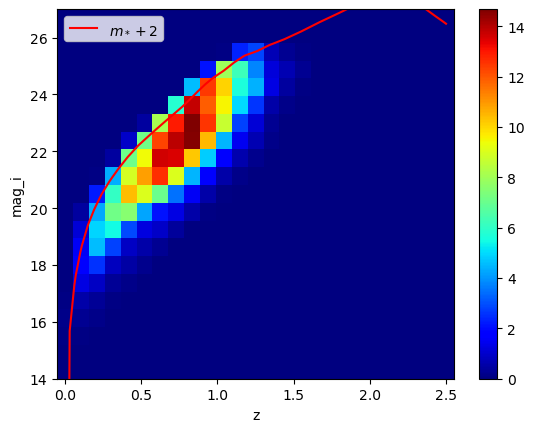

In [14]:
x, y = np.meshgrid(z_bins, mag_bins)
#print(x)
#print(y)
c = plt.pcolormesh(x, y, density.T, cmap='jet', vmin=0)
plt.plot(cosmo_values['z'], cosmo_values['mag_i'] + 2, color = 'r', label = '$m_* + 2$')
#ax.set_xlim(0.2,1.2)
#ax.set_ylim(10**13,10**15)
plt.xlabel('z')
plt.ylabel('mag_i')
plt.ylim([14,27])
#ax.set_yscale('log')
plt.colorbar(c)
plt.legend()

In [15]:
nbins_z = 25
nbins_mag = 25
z_bins=np.linspace(0,max(cosmo_values['z']),25)
mag_bins=np.linspace(13,28,25)
n_gal, z, m = np.histogram2d(am_mb_c['z'], am_mb_c['mag_i'], bins=[nbins_z,nbins_mag], range=[[z_bins[0],z_bins[nbins_z-1]],[mag_bins[0],mag_bins[nbins_mag-1]]], weights = am_mb_c['pmem'])
density = n_gal/439.78986

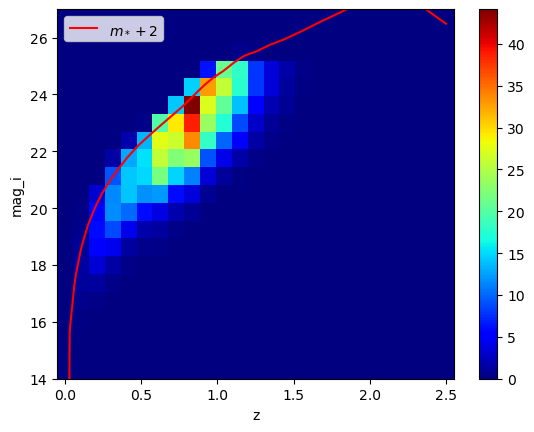

In [16]:
x, y = np.meshgrid(z_bins, mag_bins)
#print(x)
#print(y)
c = plt.pcolormesh(x, y, density.T, cmap='jet', vmin=0)
plt.plot(cosmo_values['z'], cosmo_values['mag_i'] + 2, color = 'r', label = '$m_* + 2$')
#ax.set_xlim(0.2,1.2)
#ax.set_ylim(10**13,10**15)
plt.xlabel('z')
plt.ylabel('mag_i')
plt.ylim([14,27])
#ax.set_yscale('log')
plt.colorbar(c)
plt.legend()

546.0571750793606 393.0 431.26429376984015
Plotting...
749.394715923816 688.0 703.348678980954
Plotting...
1555.1749149546959 930.0 1086.293728738674
Plotting...
472.8937617139891 418.0 431.72344042849727
Plotting...
246.51224112138152 75.0 117.87806028034538
Plotting...
10.886947005987167 12.0 11.721736751496792
Plotting...


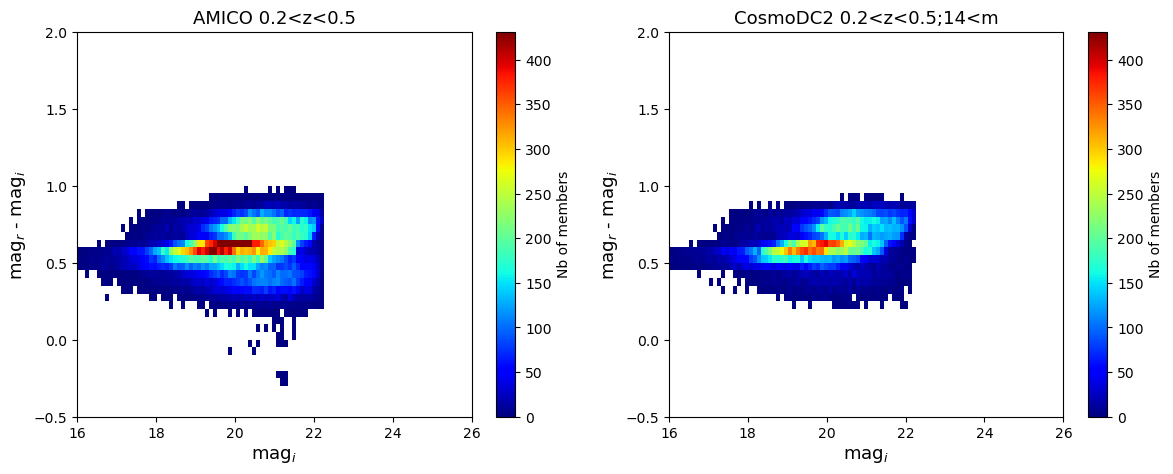

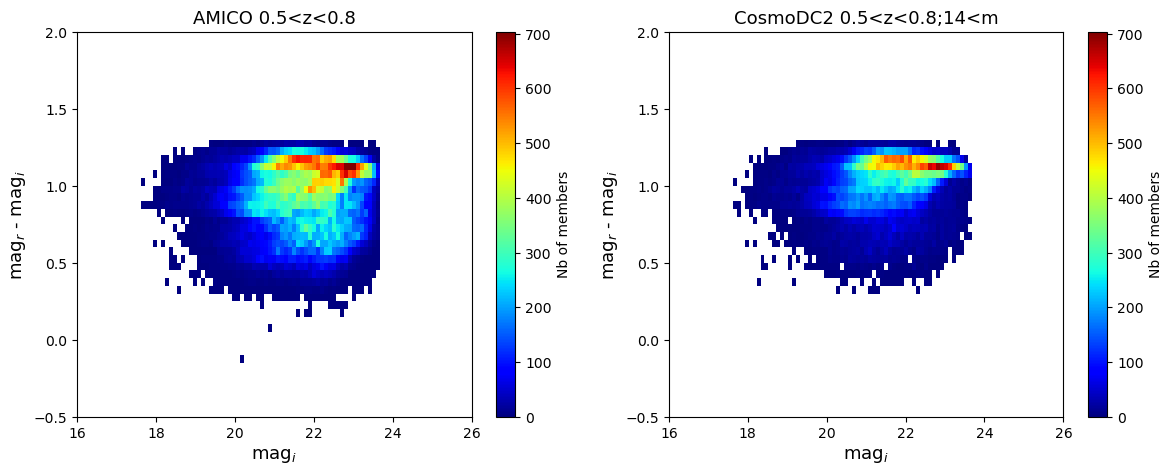

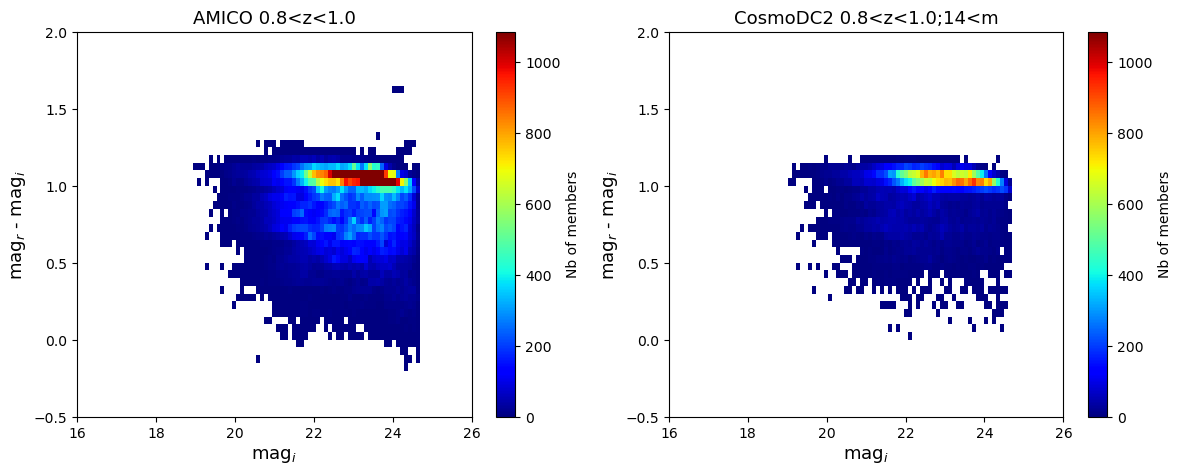

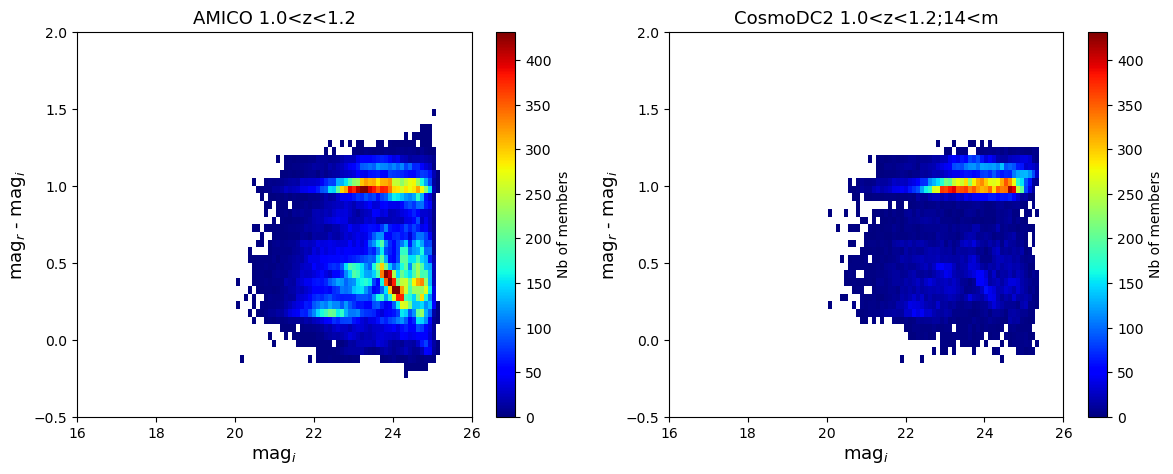

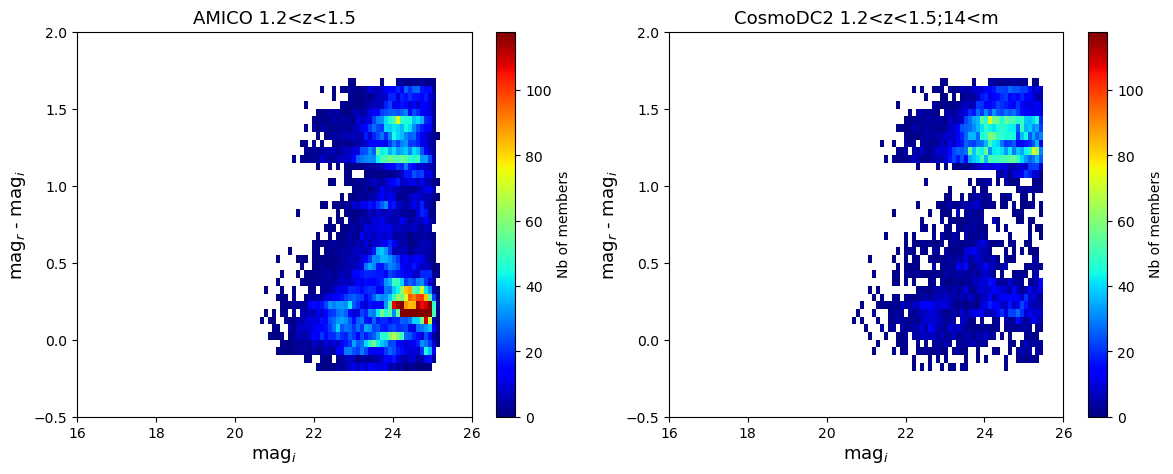

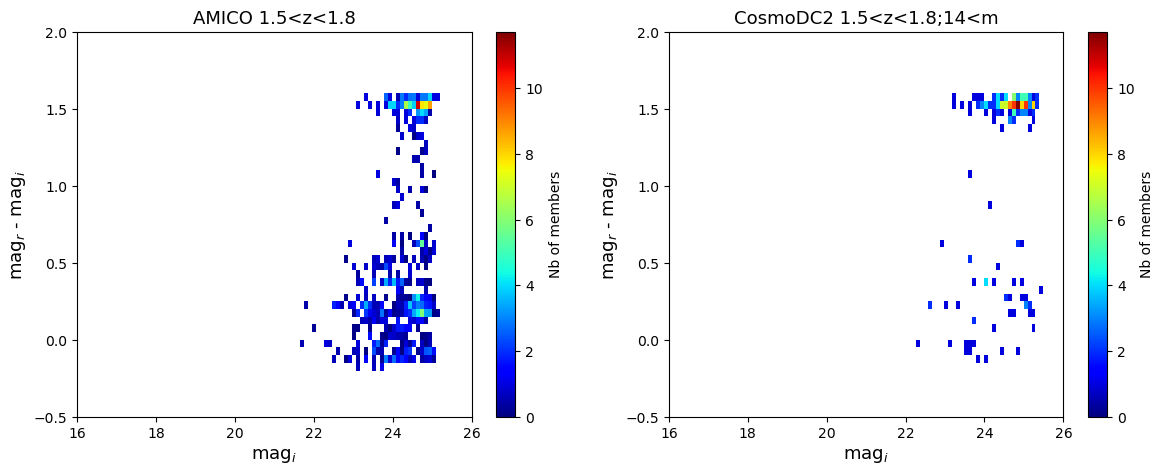

In [17]:
bin1 = [0.2,0.5,0.8,1.0,1.2,1.5,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        cdc_mb_cdt = cdc_mb_c[(cdc_mb_c['z']>=z_min)*(cdc_mb_c['z']<=z_max)]
        cdc_mb_delt = cdc_mb_cdt['mag_r'] - cdc_mb_cdt['mag_i']

        x_bins = np.linspace(16,26,100)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = np.histogram2d(am_mb_cdt['mag_i'], am_mb_delt, bins = (x_bins,y_bins), weights = am_mb_cdt['pmem'])
        cdc_hist = np.histogram2d(cdc_mb_cdt['mag_i'], cdc_mb_delt, bins = (x_bins,y_bins))
        am_hist = am_hist[0]
        cdc_hist = cdc_hist[0]
        vmax1 = np.max(am_hist)
        vmax2 = np.max(cdc_hist)
        vmax = (vmax1 + 3*vmax2)/4
        print(vmax1, vmax2, vmax)
        am_hist[am_hist==0] = np.nan
        cdc_hist[cdc_hist==0] = np.nan

        x, y = np.meshgrid(x_bins, y_bins)
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))
        print('Plotting...')
        c = ax1.pcolormesh(x, y, am_hist.T, cmap='jet', vmin=0, vmax = vmax)
        ax1.set_xlabel('mag$_i$', fontsize = 13)
        ax1.set_ylabel('mag$_r$ - mag$_i$', fontsize = 13)
        ax1.set_title('AMICO ' + str(z_min) + '<z<' + str(z_max), fontsize = 13)
        cc1 = ax2.pcolormesh(x, y, cdc_hist.T, cmap='jet', vmin=0, vmax = vmax)
        ax2.set_xlabel('mag$_i$', fontsize = 13)
        ax2.set_ylabel('mag$_r$ - mag$_i$', fontsize = 13)
        ax2.set_title('CosmoDC2 ' + str(z_min) + '<z<' + str(z_max) + ';' + str(14) + '<m' , fontsize = 13)
        ax1.set_xlim([16,26])
        ax1.set_ylim([-.5,2])
        ax2.set_xlim([16,26])
        ax2.set_ylim([-.5,2])
        fig.colorbar(c, ax=ax1, label = 'Nb of members')
        fig.colorbar(cc1, ax=ax2, label = 'Nb of members')
        plt.savefig('/pbs/home/n/namourou/test_jupyter/cluster_challenge/plots/amico_cosmoDC2/mag_i/p_matching/dmagvsmag/w_rich/m_star_' + str(z_min) + '-' + str(z_max) + '_' + str(m_min) + '-' + str(m_max) + '.png')

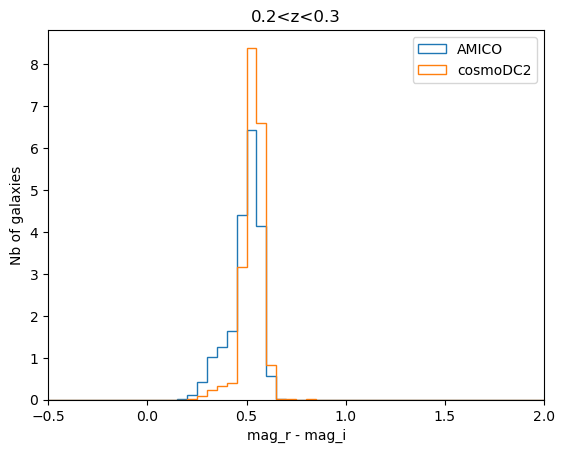

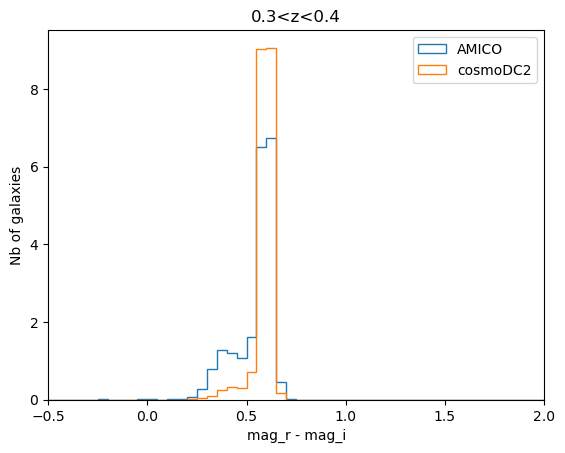

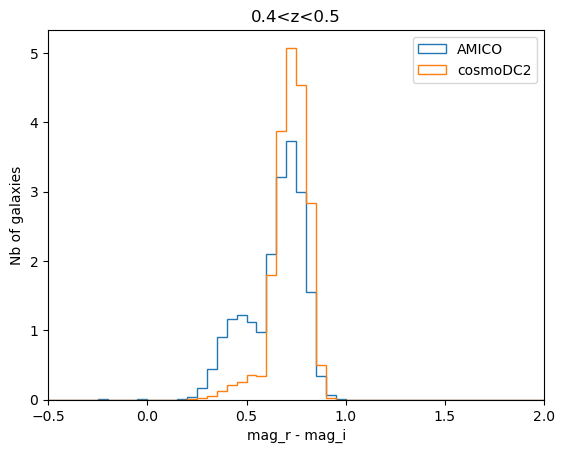

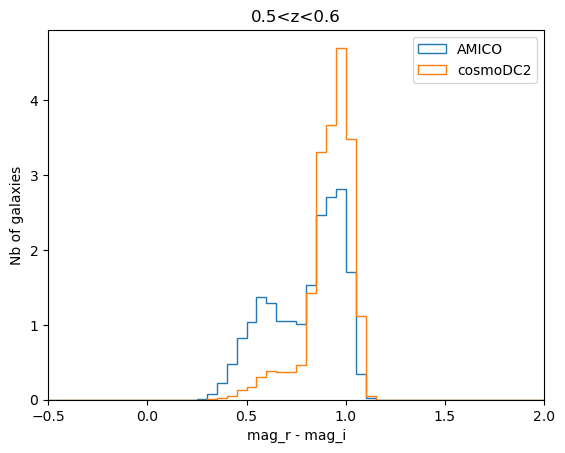

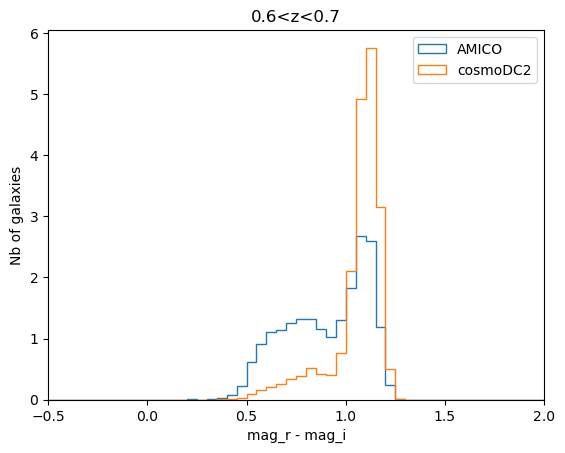

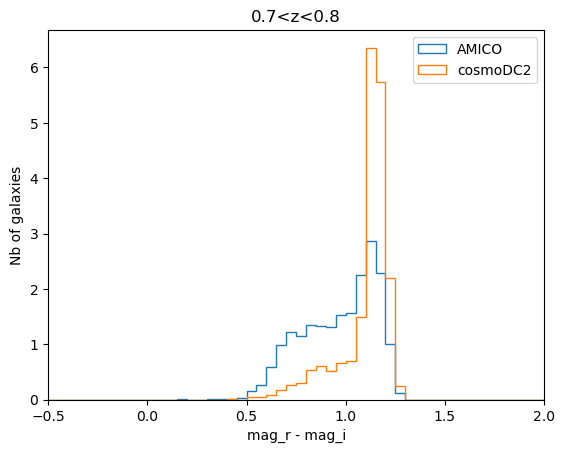

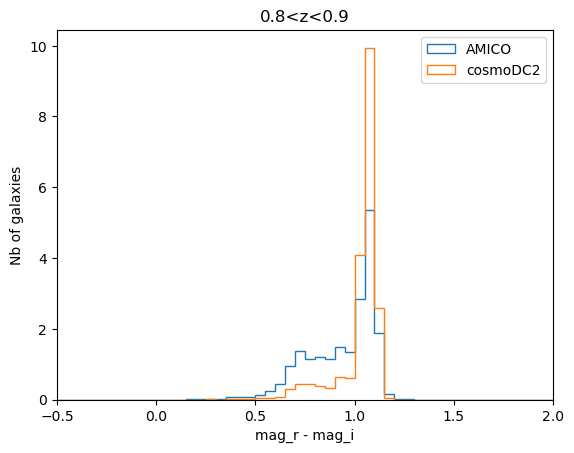

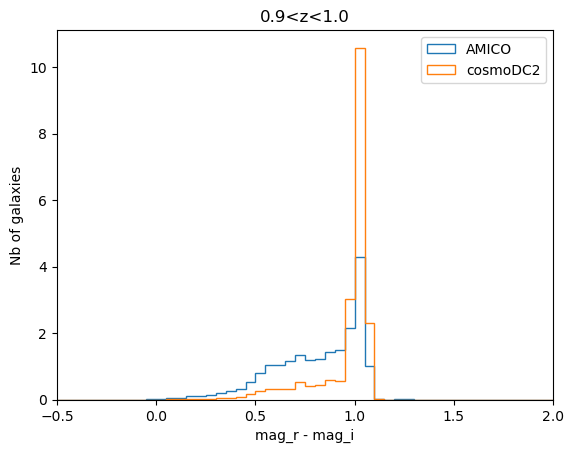

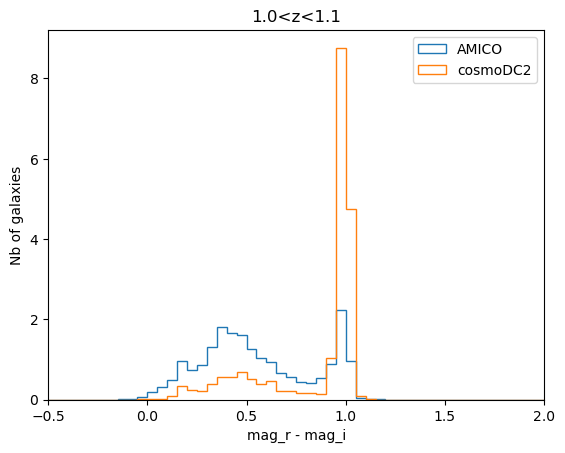

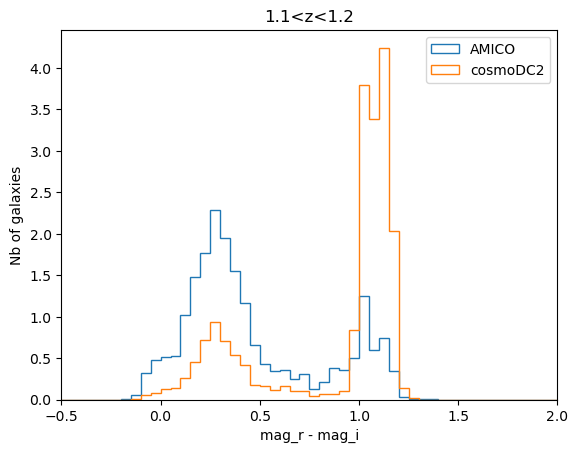

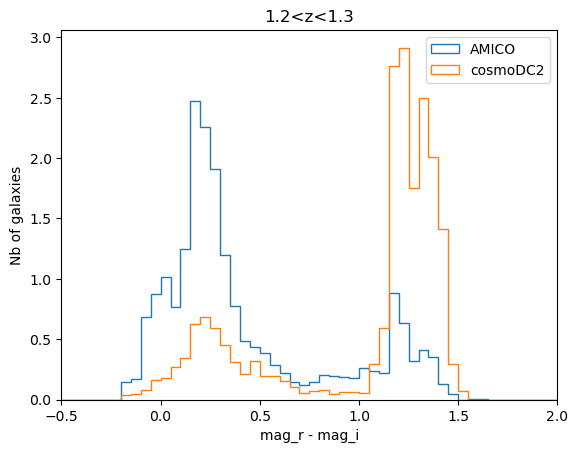

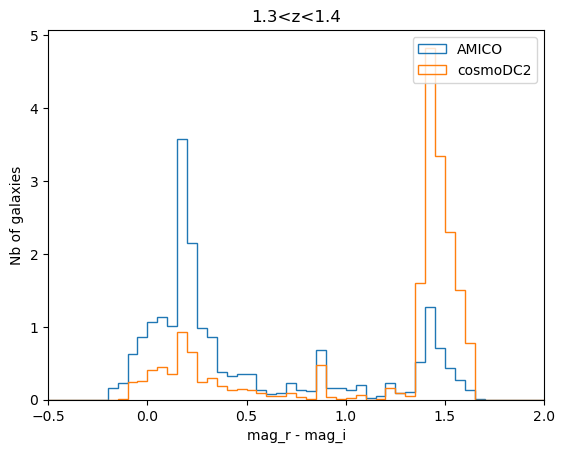

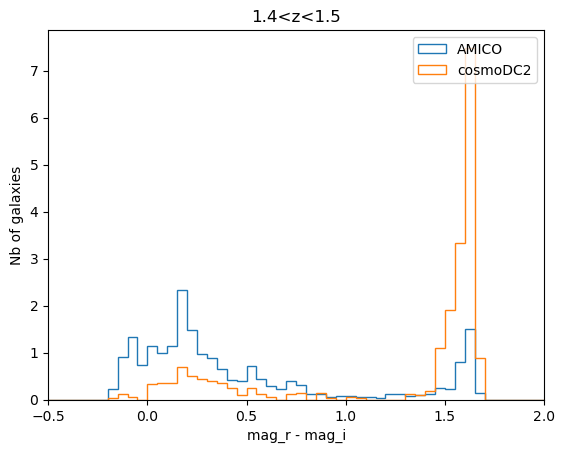

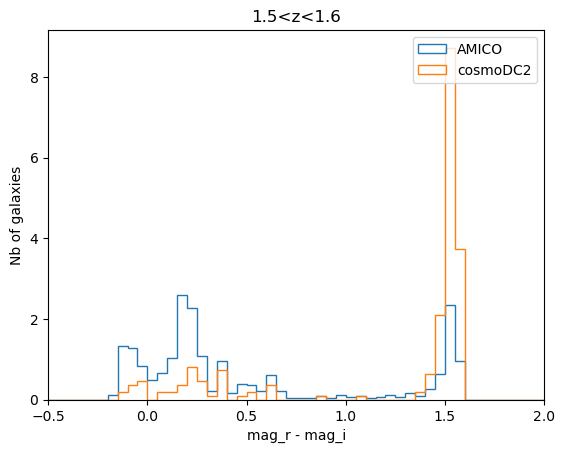

/sps/lsst/users/namourou/conda_clone_210223/descv1.1/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


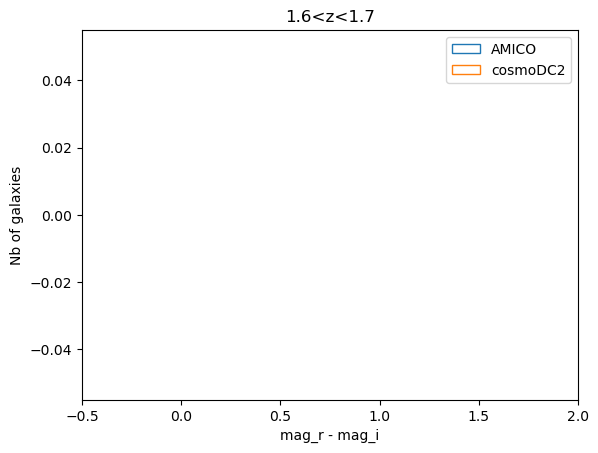

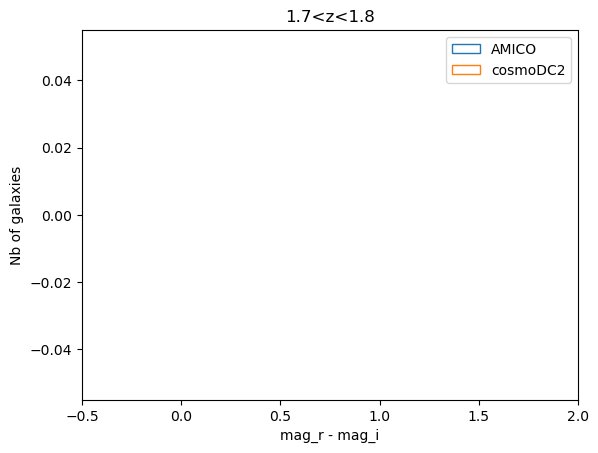

In [18]:
bin1 = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        cdc_mb_cdt = cdc_mb_c[(cdc_mb_c['z']>=z_min)*(cdc_mb_c['z']<=z_max)]
        cdc_mb_delt = cdc_mb_cdt['mag_r'] - cdc_mb_cdt['mag_i']

        x_bins = np.linspace(16,26,100)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_delt, bins = y_bins, histtype = 'step', label = 'AMICO', density = True)
        cdc_hist = plt.hist(cdc_mb_delt, bins = y_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r - mag_i')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([-0.5,2])
        plt.show()

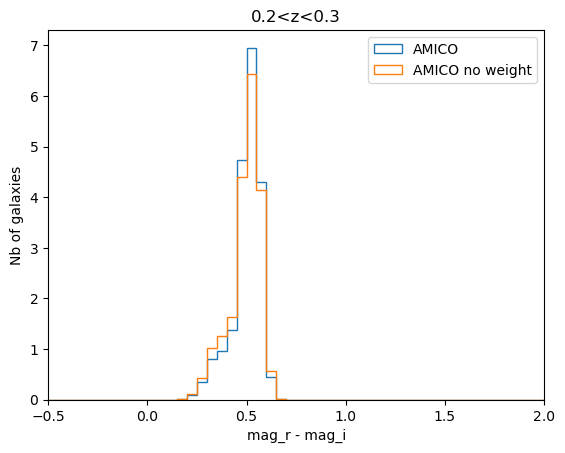

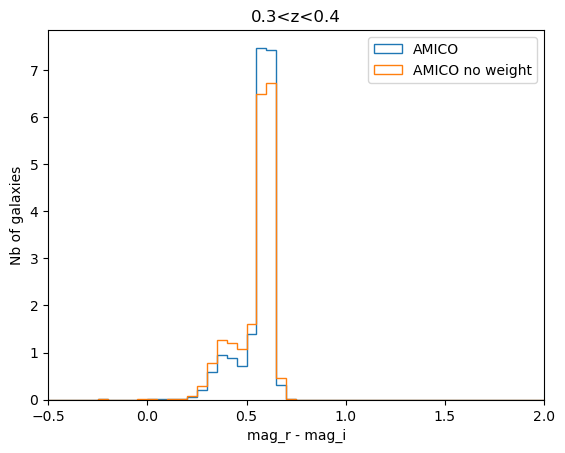

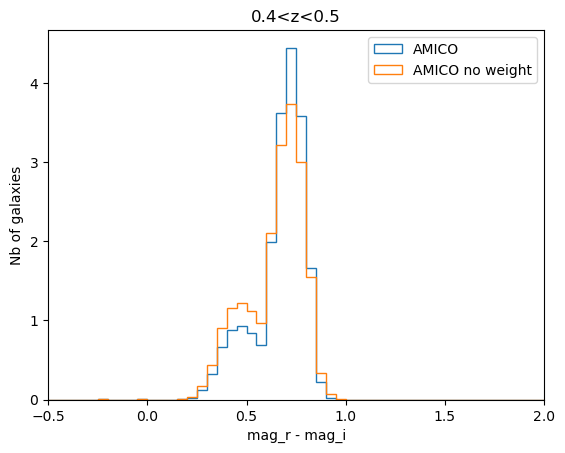

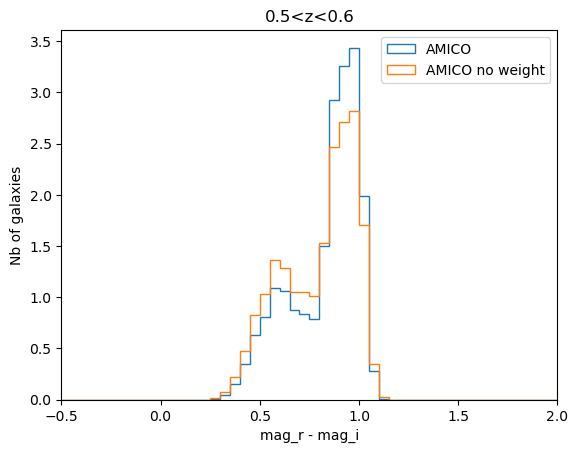

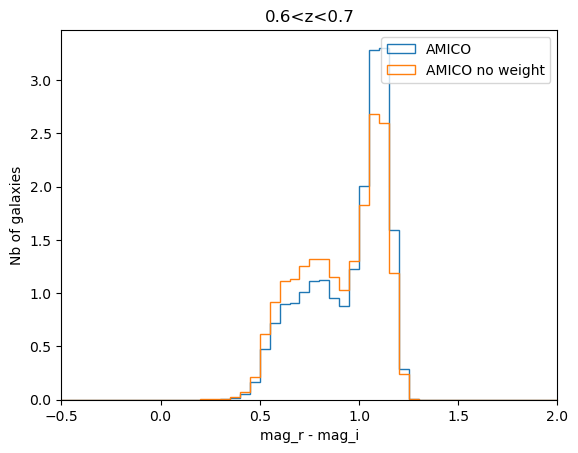

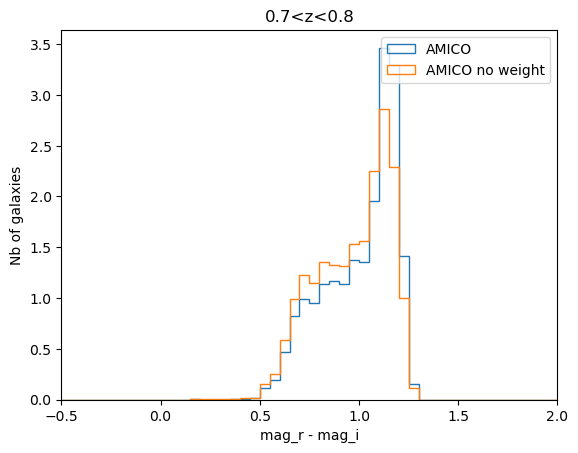

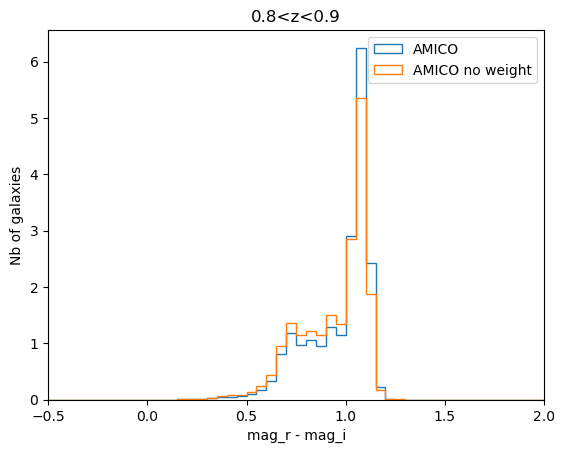

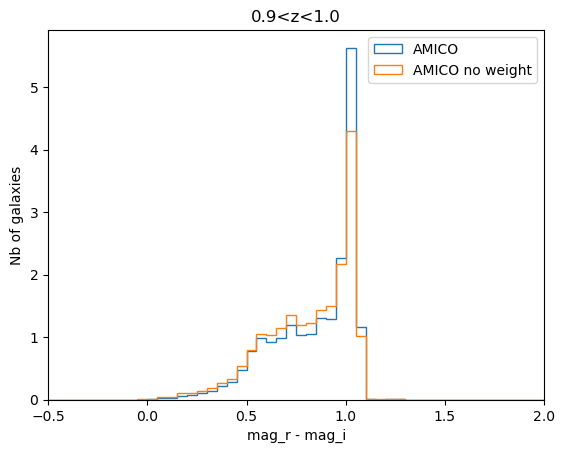

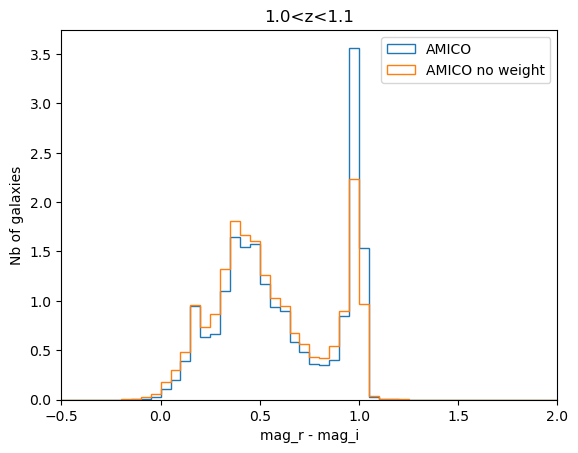

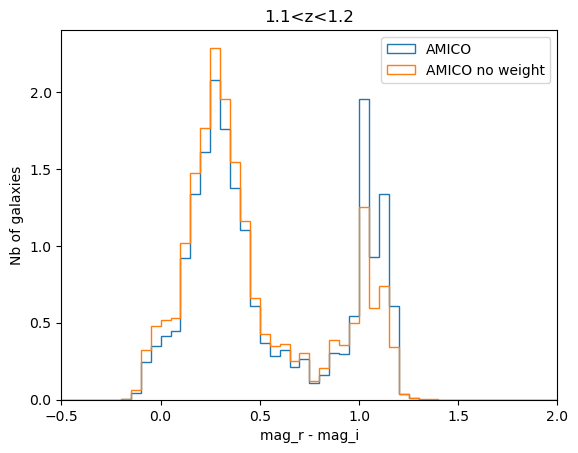

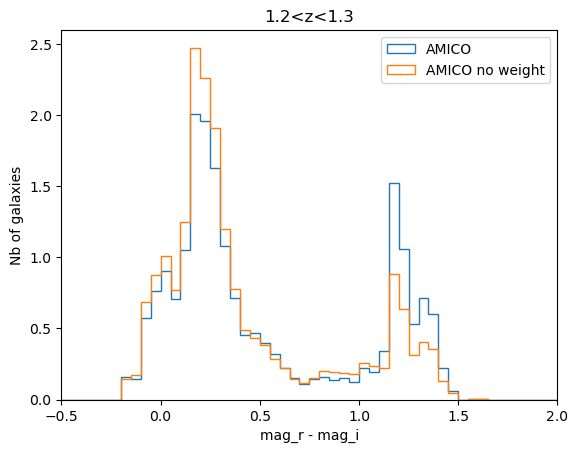

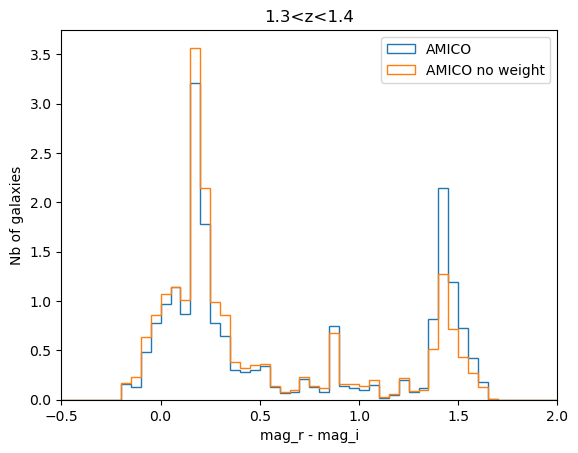

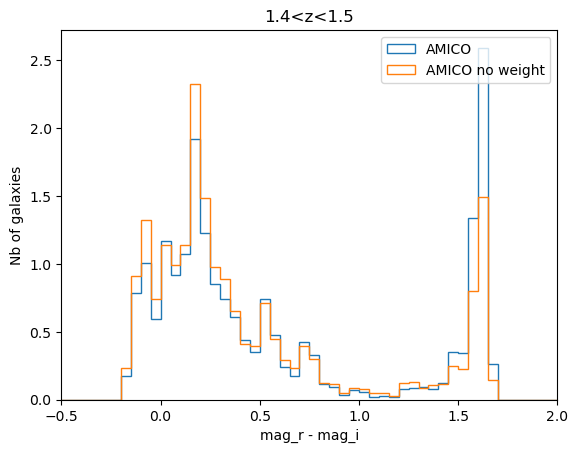

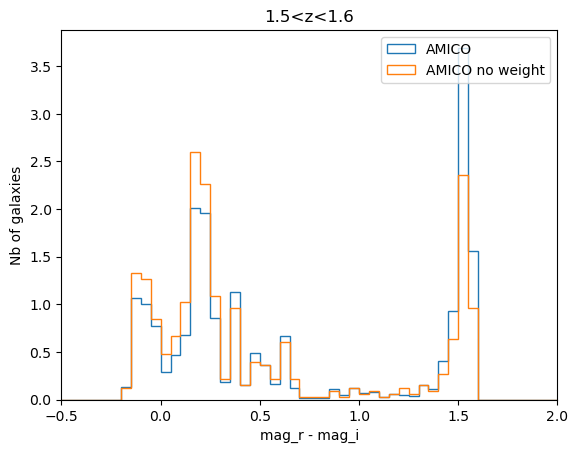

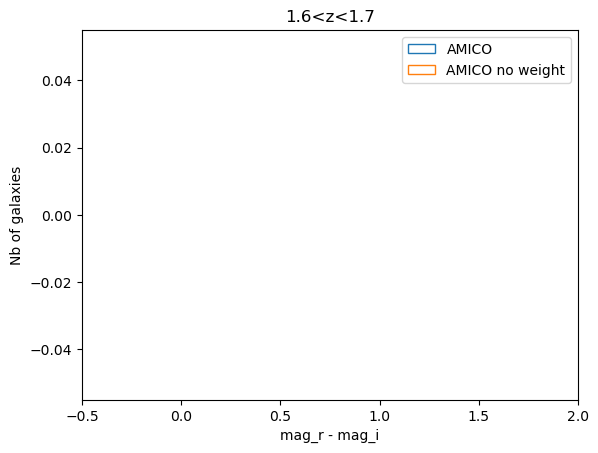

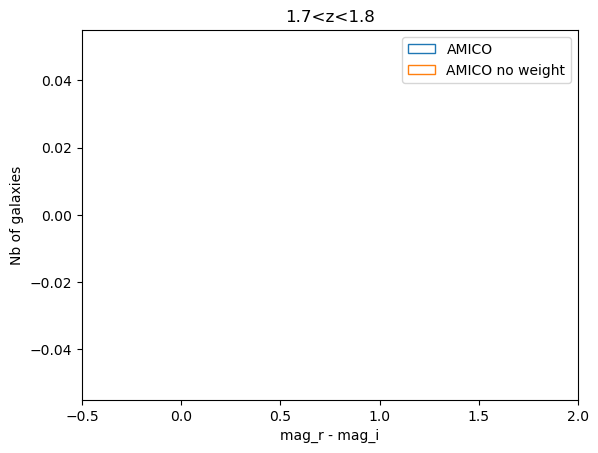

In [19]:
bin1 = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        am_mb_cdt2 = am_mb[(am_mb['z']>=z_min)*(am_mb['z']<=z_max)]
        am_mb_delt2 = am_mb_cdt2['mag_r'] - am_mb_cdt2['mag_i']
        

        x_bins = np.linspace(16,26,20)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_delt, bins = y_bins, weights = am_mb_cdt['pmem'], histtype = 'step', label = 'AMICO', density = True)
        plt.hist(am_mb_delt, bins = y_bins, histtype = 'step', label = 'AMICO no weight', density = True)
        #plt.hist(am_mb_delt2, bins = y_bins, weights = am_mb_cdt2['pmem'], histtype = 'step', label = 'AMICO weighted no cut', density = True)
        #cdc_hist = plt.hist(cdc_mb_delt, bins = y_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r - mag_i')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([-0.5,2])
        plt.show()

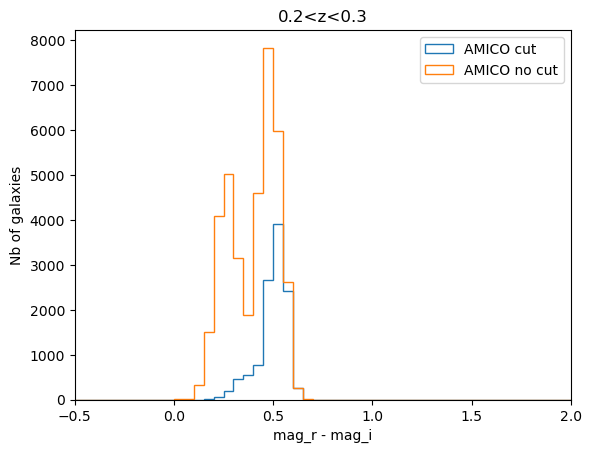

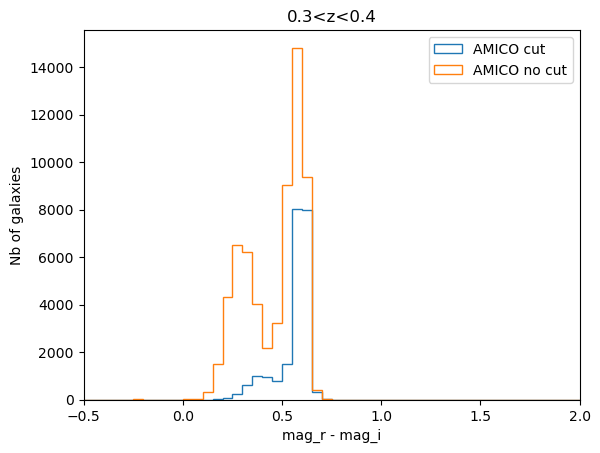

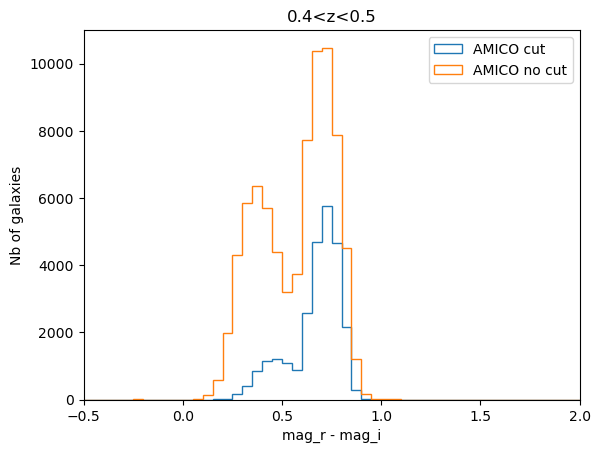

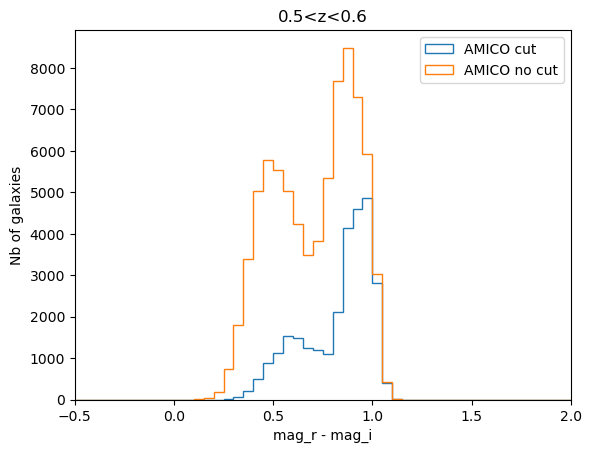

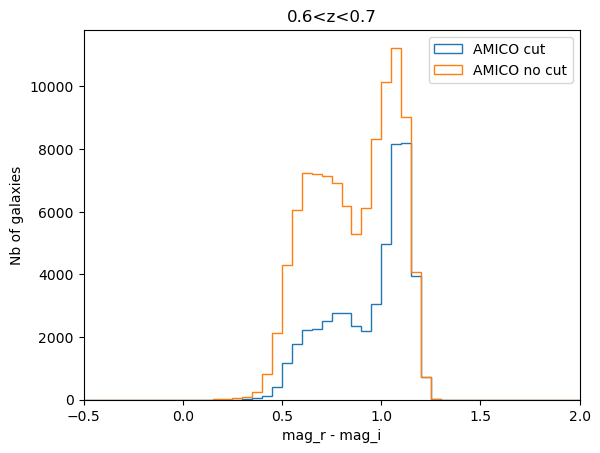

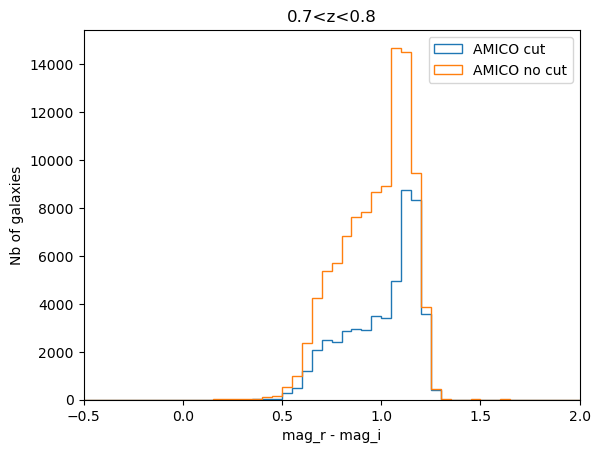

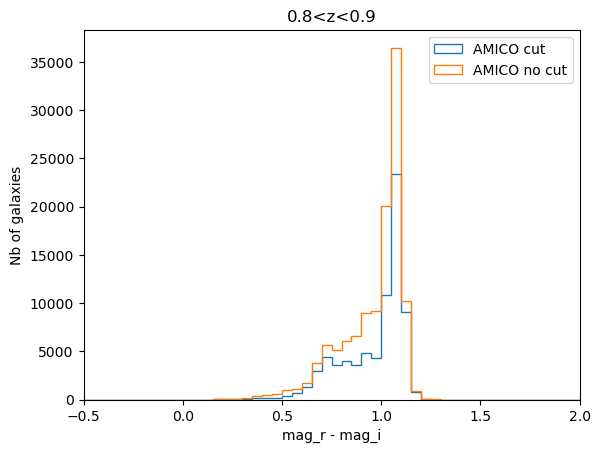

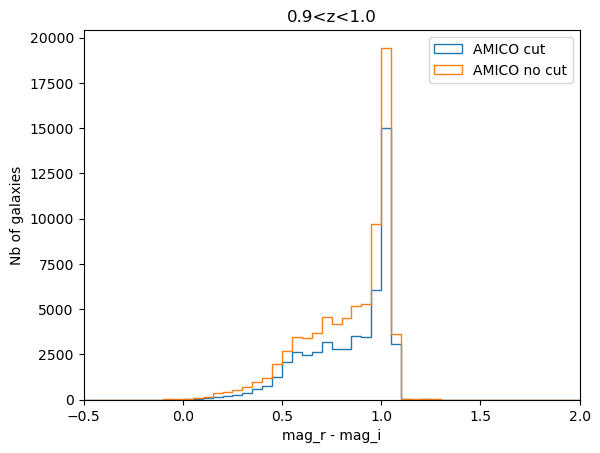

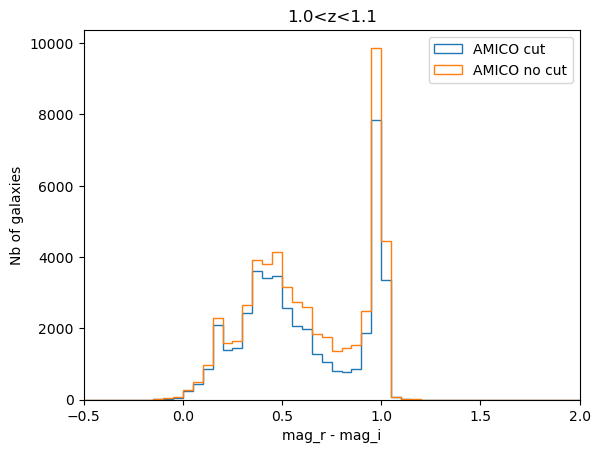

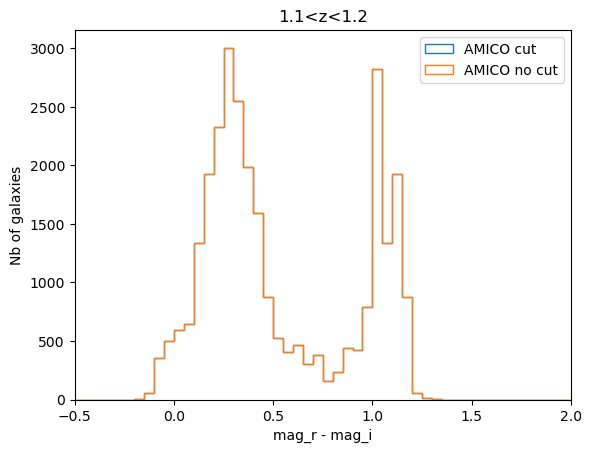

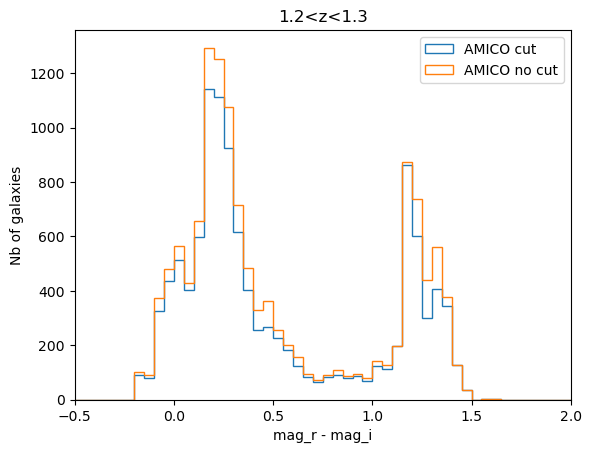

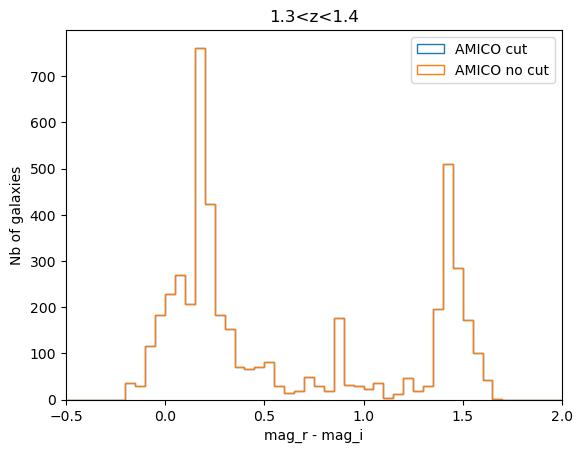

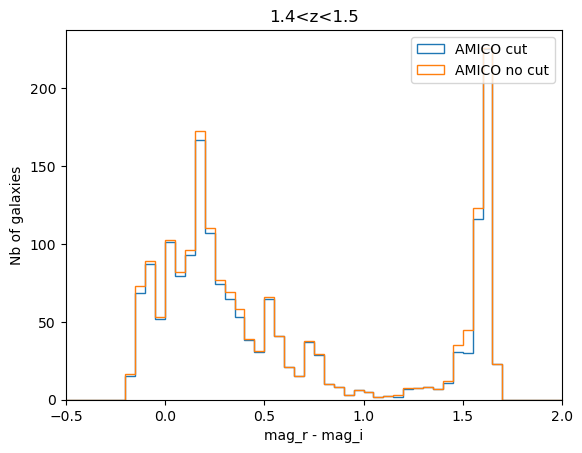

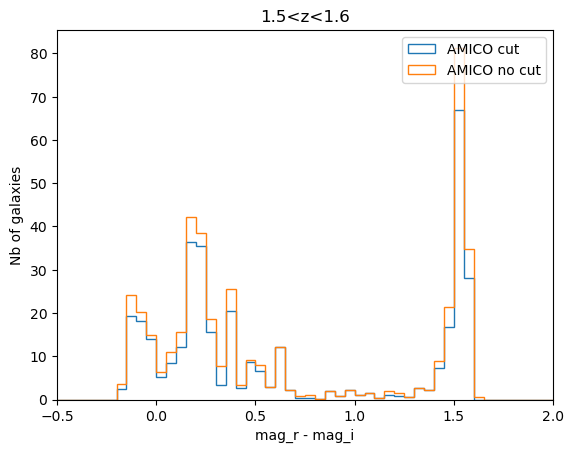

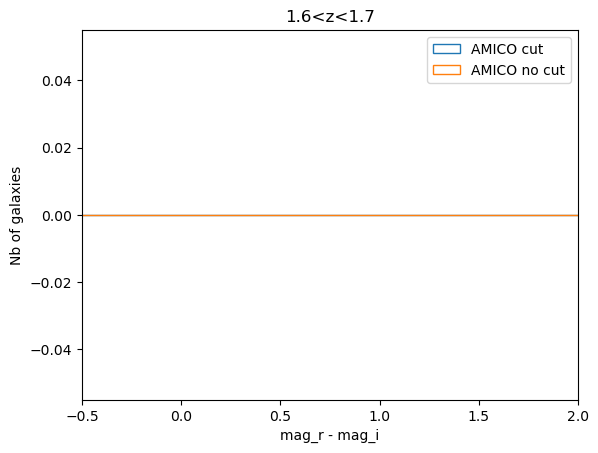

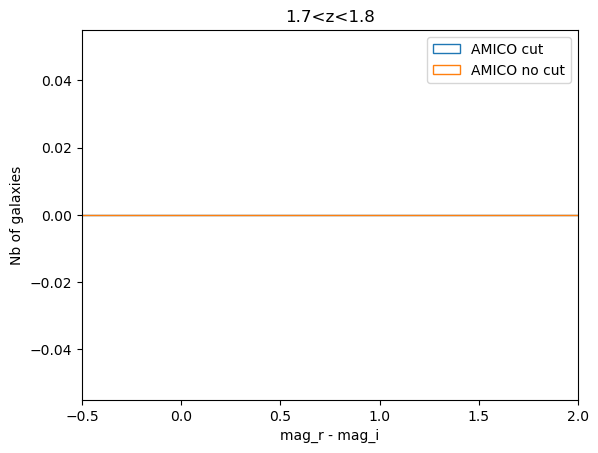

In [20]:
bin1 = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        am_mb_cdt2 = am_mb[(am_mb['z']>=z_min)*(am_mb['z']<=z_max)]
        am_mb_delt2 = am_mb_cdt2['mag_r'] - am_mb_cdt2['mag_i']
        

        x_bins = np.linspace(16,26,20)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_delt, bins = y_bins, weights = am_mb_cdt['pmem'], histtype = 'step', label = 'AMICO cut')
        #plt.hist(am_mb_delt, bins = y_bins, histtype = 'step', label = 'AMICO no weight', density = True)
        plt.hist(am_mb_delt2, bins = y_bins, weights = am_mb_cdt2['pmem'], histtype = 'step', label = 'AMICO no cut')
        #cdc_hist = plt.hist(cdc_mb_delt, bins = y_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r - mag_i')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([-0.5,2])
        plt.show()

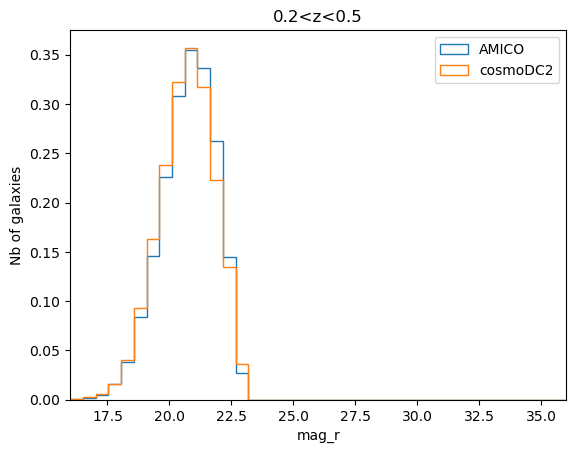

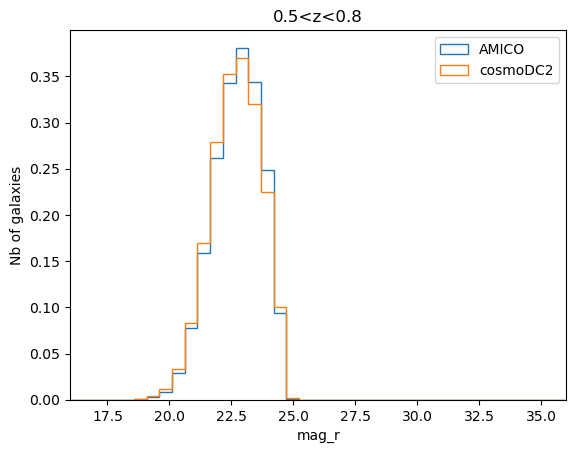

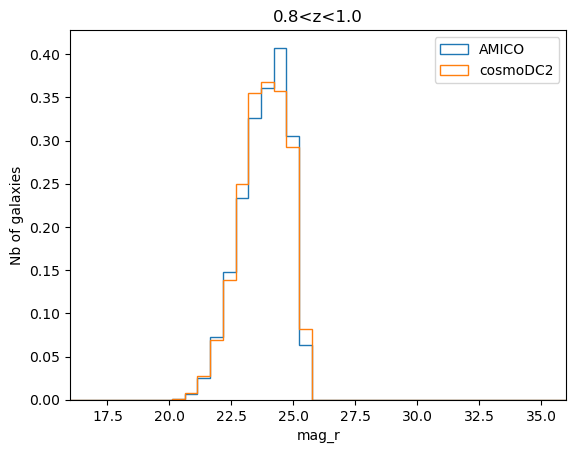

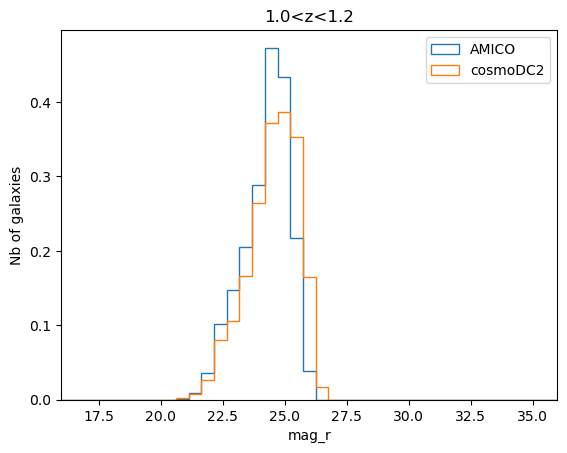

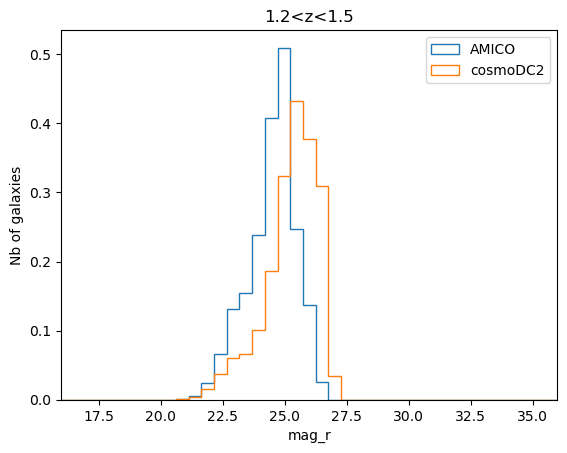

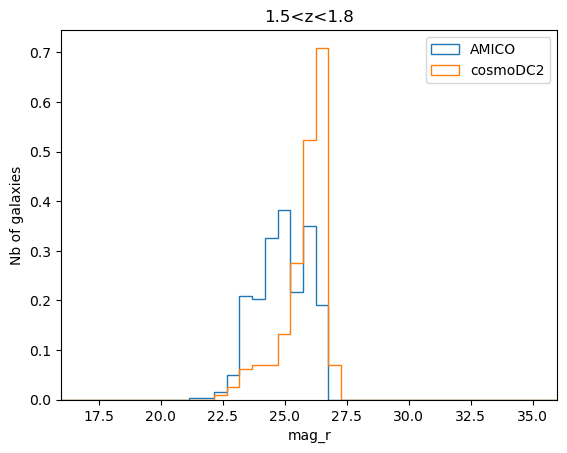

In [21]:
bin1 = [0.2,0.5,0.8,1.0,1.2,1.5,1.8]
bin2 = [13,13.5]
for i in range(0,len(bin1)-1):
    for j in range(0,len(bin2)-1):
        z_min = bin1[i]
        z_max = bin1[i+1]
        m_min = bin2[j]
        m_max = bin2[j+1]
        
        am_mb_cdt = am_mb_c[(am_mb_c['z']>=z_min)*(am_mb_c['z']<=z_max)]
        am_mb_delt = am_mb_cdt['mag_r'] - am_mb_cdt['mag_i']
        
        cdc_mb_cdt = cdc_mb_c[(cdc_mb_c['z']>=z_min)*(cdc_mb_c['z']<=z_max)]
        cdc_mb_delt = cdc_mb_cdt['mag_r'] - cdc_mb_cdt['mag_i']

        x_bins = np.linspace(16,36,40)
        y_bins = np.linspace(-0.5,2,51)

        am_hist = plt.hist(am_mb_cdt['mag_r'], bins = x_bins, weights = am_mb_cdt['pmem'], histtype = 'step', label = 'AMICO', density = True)
        cdc_hist = plt.hist(cdc_mb_cdt['mag_r'], bins = x_bins, histtype = 'step', label = 'cosmoDC2', density = True)
        plt.title(str(z_min) + '<z<' + str(z_max))
        plt.xlabel('mag_r')
        plt.ylabel('Nb of galaxies')
        plt.legend()
        plt.xlim([16,36])
        plt.show()